<a href="https://colab.research.google.com/github/ushnish2001/LGMVIP-Data-Science/blob/main/StockMarketPrediction_%26_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LGM Internship

Author : USHNISH CHAKRAVARTY

BEGINNER LEVEL TASK

Task 3 - VIP Data Science Task

**Stock Market Prediction and Forecasting**

This predicts how a particular stock price can vary over a period of time and forecasts how much it will be in future

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.count()

Date                    2035
Open                    2035
High                    2035
Low                     2035
Last                    2035
Close                   2035
Total Trade Quantity    2035
Turnover (Lacs)         2035
dtype: int64

In [ ]:
df.shape

(2035, 8)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
df.value_counts()

Date        Open    High    Low     Last    Close   Total Trade Quantity  Turnover (Lacs)
2018-09-28  234.05  235.95  230.20  233.50  233.75  3069914               7162.35            1
2013-04-10  130.85  131.80  128.50  130.90  131.00  1396238               1817.54            1
2013-03-20  129.10  130.40  127.00  128.55  128.35  2640664               3399.29            1
2013-03-21  128.55  128.60  123.45  123.80  124.60  2807473               3541.91            1
2013-03-22  125.00  127.50  122.60  126.30  125.90  1442967               1806.03            1
                                                                                            ..
2016-01-11  143.20  144.00  140.95  141.60  141.90  1201860               1714.30            1
2016-01-12  142.40  143.45  138.05  139.90  139.50  1353097               1896.92            1
2016-01-13  141.75  141.95  130.30  135.40  135.60  1907971               2586.28            1
2016-01-14  132.10  136.25  131.15  133.90  134.05  143

In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [ ]:
from pandas.plotting import scatter_matrix
col = ['Open','High','Low','Last','Total Trade Quantity','Turnover (Lacs)']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e60e6ced0>,
      dtype=object)

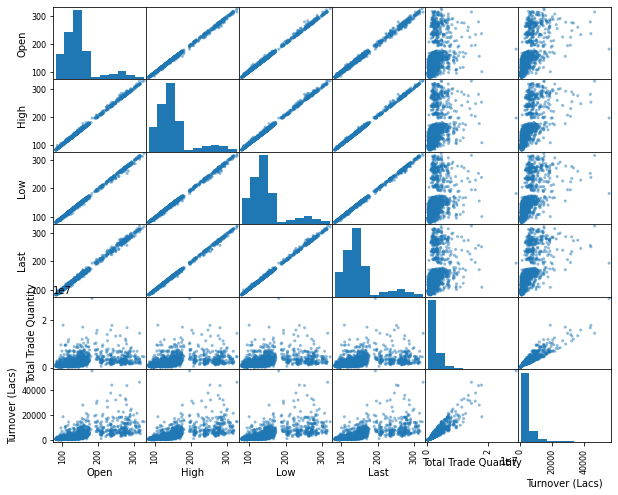

In [ ]:
scatter_matrix(df[col],figsize=(10,8))

**In any stock market or in share exchange , the profit or loss calculation is usually determined by the closing price of the stock for the day**

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

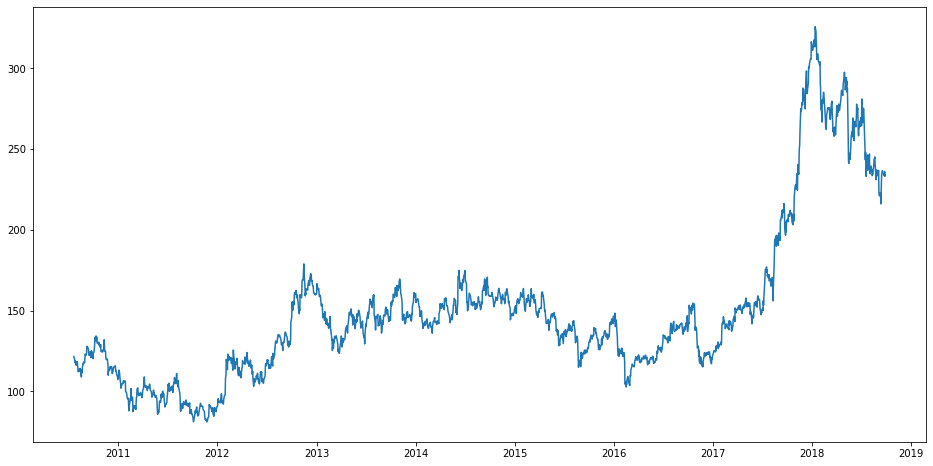

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price History')

Average Method

In [ ]:
data = df.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
  new_data['Date'][i]=data['Date'][i]
  new_data['Close'][i]=data['Close'][i]
train=new_data[:987]
valid=new_data[987:]

In [ ]:
new_data.shape , train.shape , valid.shape
((1235,2),(987,2),(248,2))

((1235, 2), (987, 2), (248, 2))

In [ ]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2010-07-21 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2014-07-02 00:00:00'),
 Timestamp('2018-09-28 00:00:00'))

In [ ]:
preds=[]
for i in range(0,1048):
  a=train['Close'][len(train)-248+i:].sum()+sum(preds)
  b=a/1048
  preds.append(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


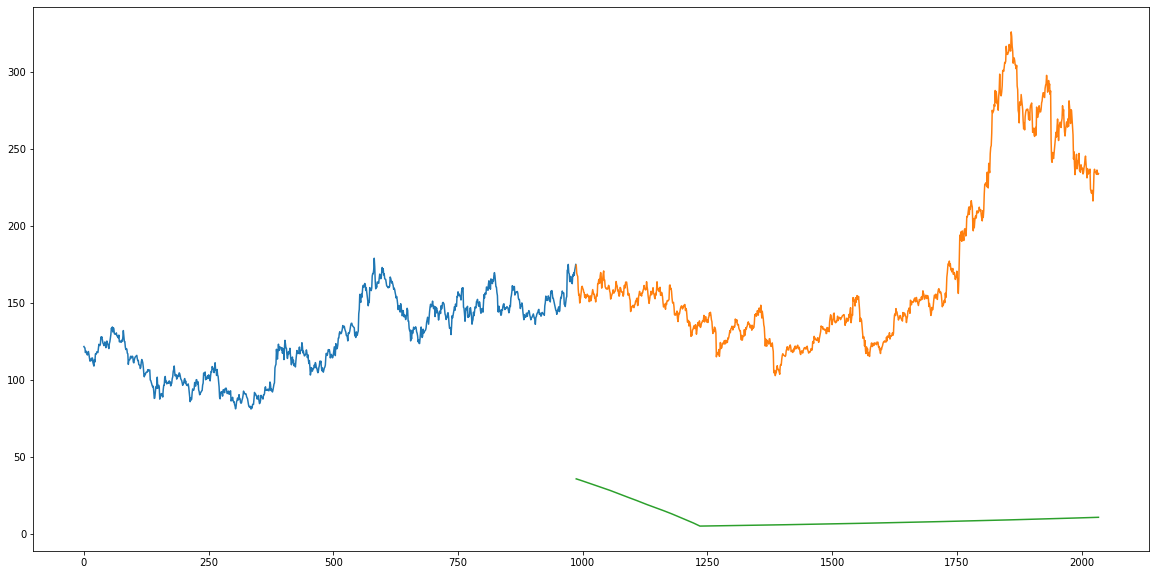

In [ ]:
valid['Predictions']=0
valid['Predictions']=preds
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

169.97671310771446

*With Linear Regression model, it is not always to give the best relation upto date. We need time series forecasting series to get the best outcome.*

**LSTM is able to store past information that is important and forget the information that is not.**

**LSTM MODEL**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
  new_data['Date'][i]=data['Date'][i]
  new_data['Close'][i]=data['Close'][i]

In [ ]:
new_data.index = new_data.Date
new_data.drop('Date',axis=1,inplace=True)

In [ ]:
dataset=new_data.values

In [ ]:
train=dataset[0:987,:]
valid=dataset[987:,:]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [],[]
for i in range(60,len(train)):
  x_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2)

927/927 - 43s - loss: 0.0010


In [ ]:
inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

11.38959751597303

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


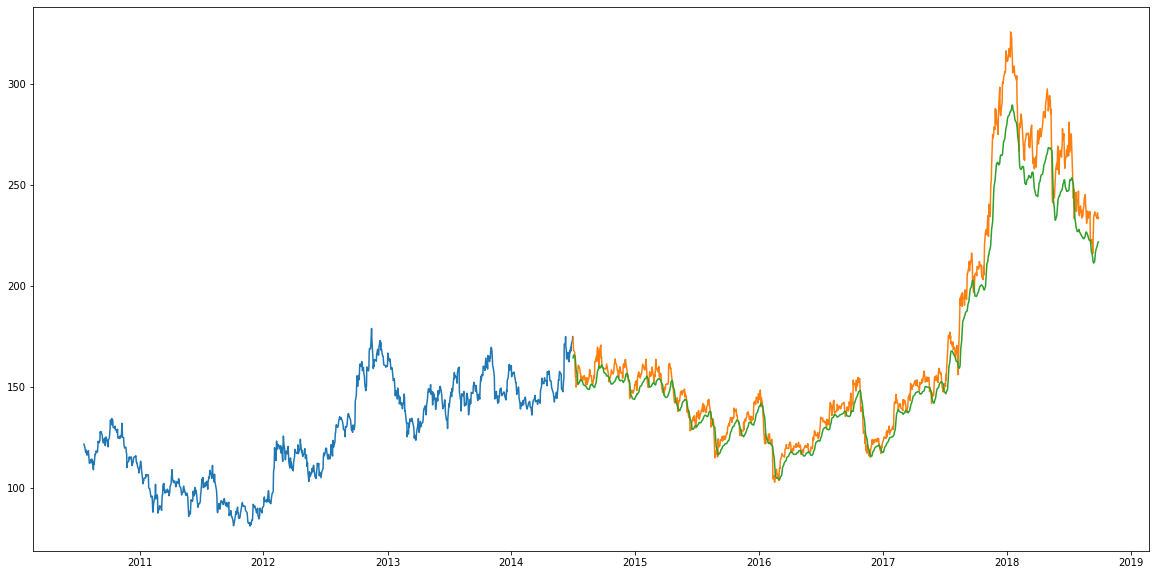

In [ ]:
train=new_data[:987]
valid=new_data[987:]
valid['Predictions']=closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])